## Problem statement

Predict the diabetes status of a patient given their health measurements.In previous efforts, I could not come up with a better accuracy so, I have tried to improve accuracy in this excercise.<br>

# 1) Importing Libraries

In [1]:
# For warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# For processing
import numpy as np
import pandas as pd

In [4]:
# For deep learning
from keras.models import Sequential
from keras.layers import Dense
import numpy
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


# 2) Loading dataset
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [5]:
# read the data into a Pandas DataFrame
pima = pd.read_csv('diabetes.csv')

In [6]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
print(pima.columns) # to know all the features(variables) we got in our data

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


**Detail about each feature**

Pregnancies: Number of times pregnant <br>

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br>

BloodPressure: Diastolic blood pressure (mm Hg) <br>

SkinThickness: Triceps skin fold thickness (mm) <br>

Insulin: 2-Hour serum insulin (mu U/ml) <br>

BMI: Body mass index (weight in kg/(height in m)^2) <br>

DiabetesPedigreeFunction: Diabetes pedigree function <br>

Age: Age (years) <br>

Outcome: Class variable (0 or 1) <br>

In [8]:
pima.shape

(768, 9)

In [9]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
pima.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [12]:
pima['Outcome'].value_counts().sort_values(ascending=False)

0    500
1    268
Name: Outcome, dtype: int64

# 3) Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018436C8EAC8>,
      dtype=object)

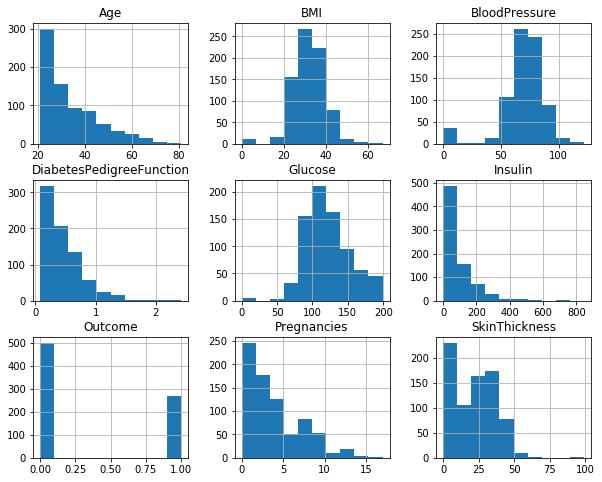

In [13]:
pima.hist(figsize=(10,8))

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

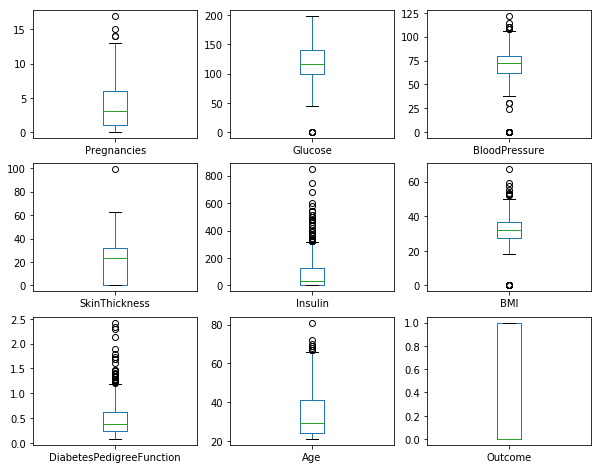

In [14]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

###     check dependent variable

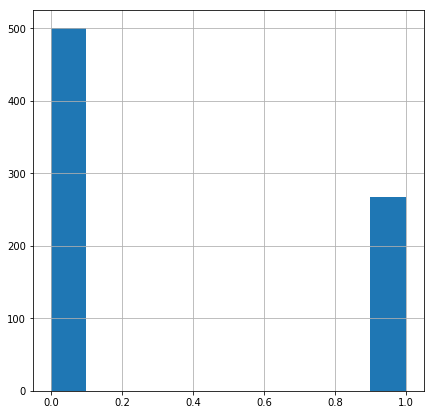

In [15]:
pima['Outcome'].hist(figsize=(7,7))

**we can easily see that the Non-Diabetic persons is more than the diabetics. There is a risk of biaseness in our model and we got to take good care of it**

In [16]:
corr = pima[pima.columns].corr()

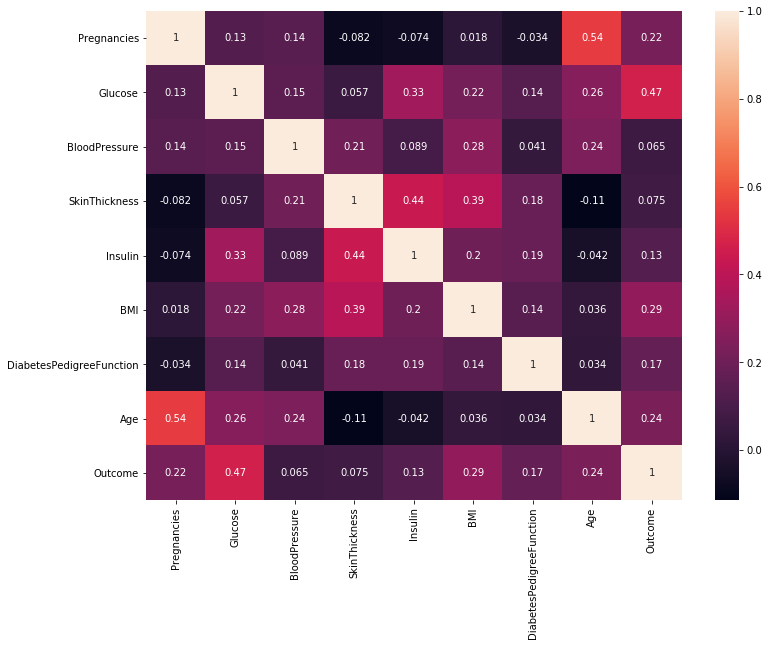

In [17]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot = True)

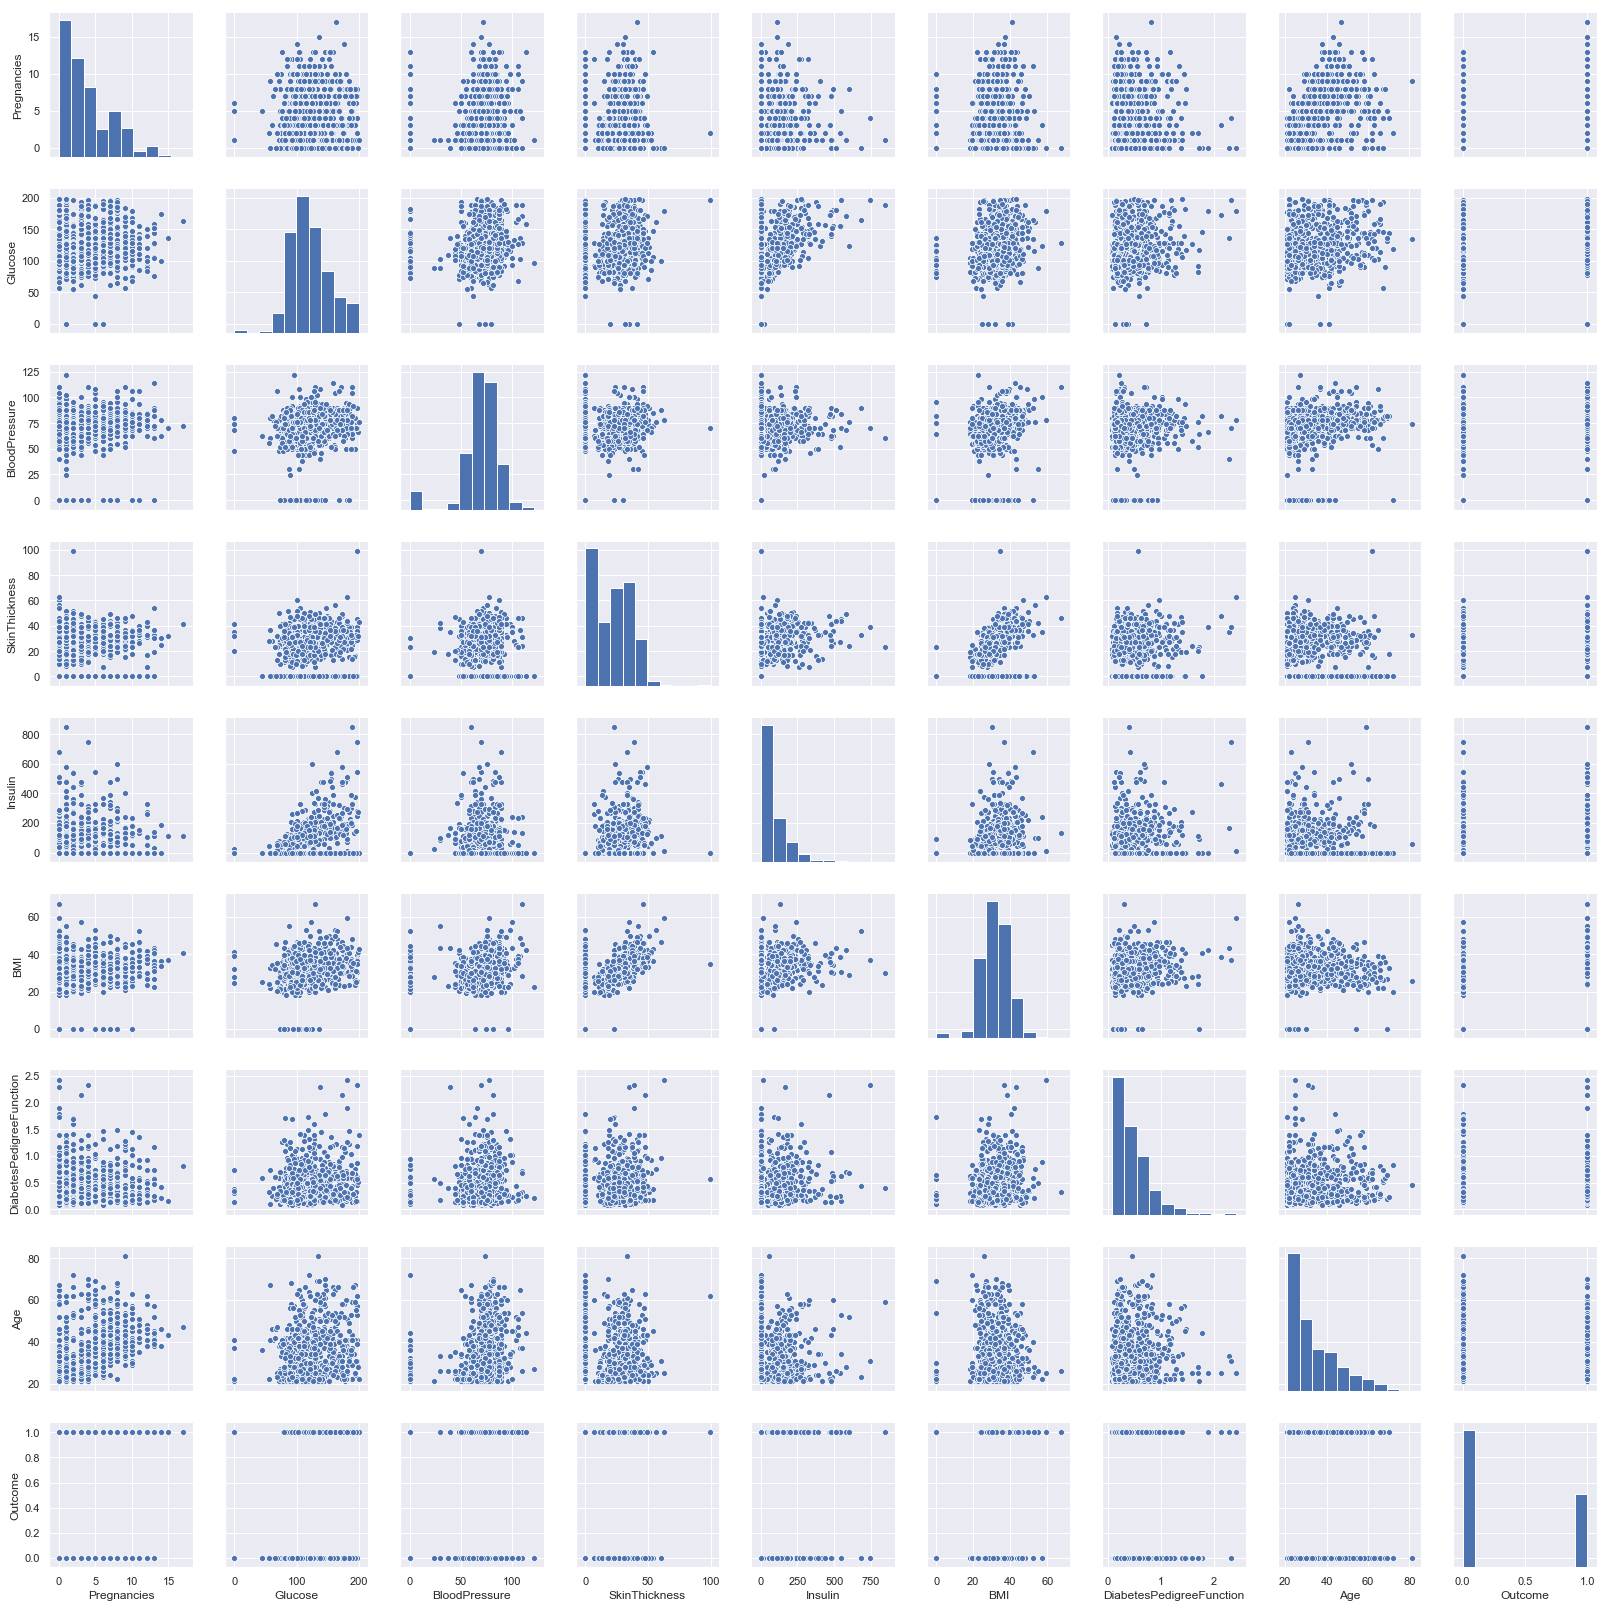

In [18]:
sns.set()
#cols = ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
sns.pairplot(pima[pima.columns], height = 2.5)
plt.show();

- bloodpressure and age tend to have a relation and that's kinda obviose since most of aged ppl have bloodpressure <br>
- Glucose and insulin have very strong relation makes me think about deleting the inslin futuere<br>
- In pregnancy/age we notice some kind of a liniar line in the right bottom<br>

# 4) Missing values

In [19]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
pima[pima.isnull().any(axis=1)].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


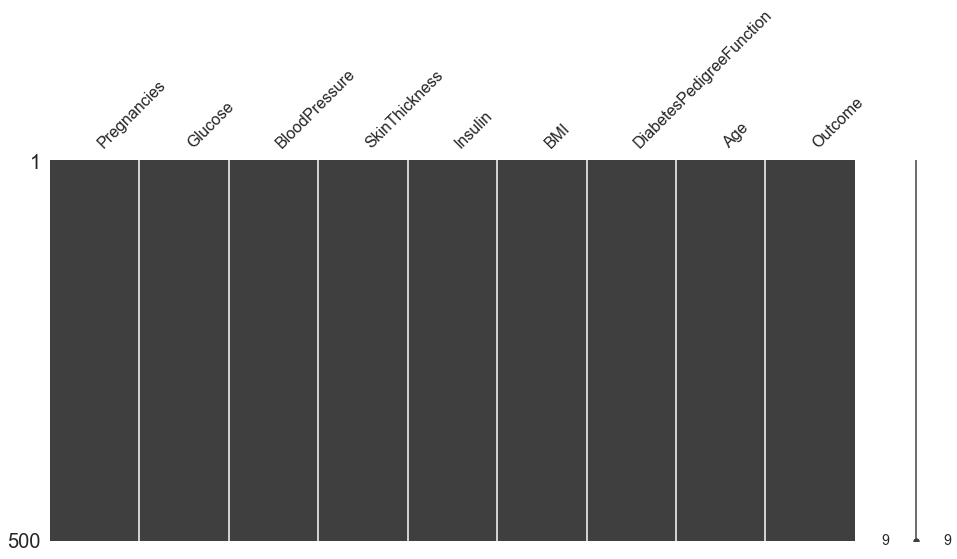

In [21]:
import missingno as msno

msno.matrix(pima.sample(500),
            figsize=(16, 7),
            width_ratios=(15, 1))

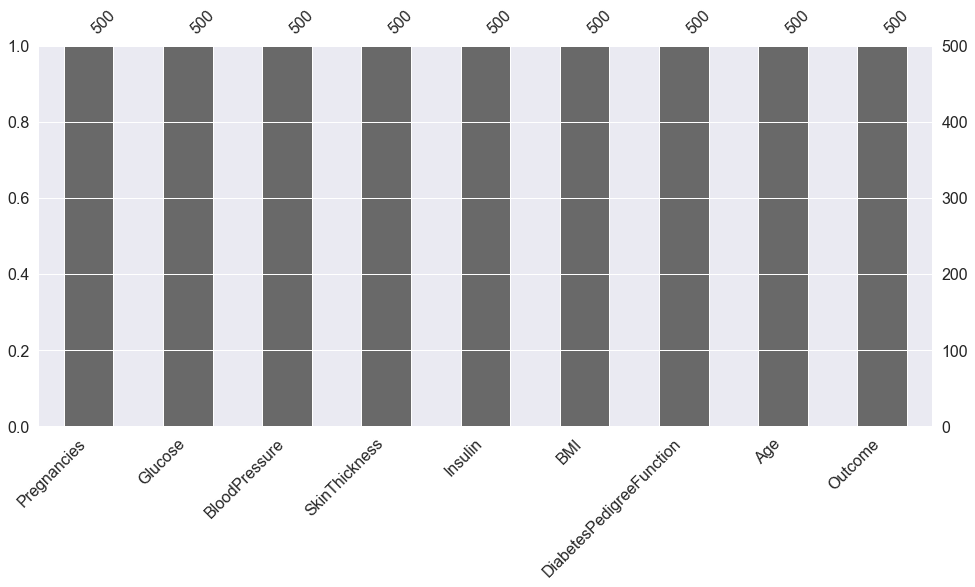

In [22]:
msno.bar(pima.sample(500),
            figsize=(16, 7),)

No missing values

# 5) Feature Extraction

Mostly this process is done after modeling and checking accuracy. As I have done this problem multiple time so, I know that there is problem of lower accuracy. Hence, this excercise is all about creating a better model

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
X = pima.iloc[:,0:8]
y = pima.iloc[:,8]
select_top_4 = SelectKBest(score_func=chi2, k = 4)

In [25]:
fit = select_top_4.fit(X,y)
features = fit.transform(X)

In [26]:
features[0:5]

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       [ 89. ,  94. ,  28.1,  21. ],
       [137. , 168. ,  43.1,  33. ]])

In [27]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**So, the top performing features are Glucose, Insulin, BMI, Age**

In [28]:
# USe top features and store in a dataframe
X_features = pd.DataFrame(data = features, columns = ["Glucose","Insulin","BMI","Age"])
y = pima.Outcome

In [29]:
print(y[0:5])

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [30]:
type(X_features)

pandas.core.frame.DataFrame

In [31]:
X_features.head()

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


###     Feature Relationship

In [32]:
def plot_relation_per_feature(data, feature): # notice feature in function is not same as features
    grouped_by_Outcome = pima[feature].groupby(pima["Outcome"])
    diabetic_per_feature = pd.DataFrame({"diabetic": grouped_by_Outcome.get_group(1),
                                        "Not-diabetic": grouped_by_Outcome.get_group(0),
                                        })
    hist = diabetic_per_feature.plot.hist(bins=60, alpha=0.6)
    hist.set_xlabel(feature)
    plt.show()

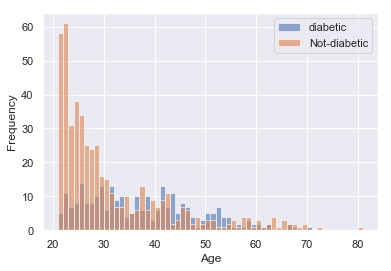

In [33]:
plot_relation_per_feature(pima, "Age")

The older the persons,The higher the number of diabetics

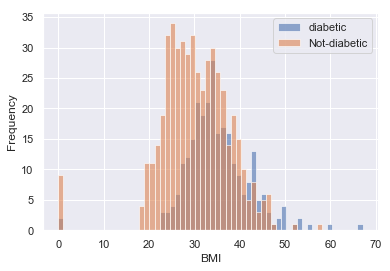

In [34]:
plot_relation_per_feature(pima, "BMI")

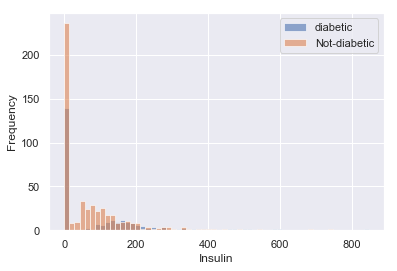

In [35]:
plot_relation_per_feature(pima, "Insulin")

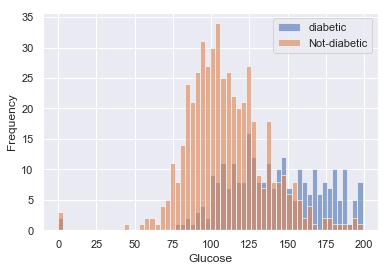

In [36]:
plot_relation_per_feature(pima, "Glucose")

Above relationships make sense

# 6) Outliers

In [37]:
# To check outliers, we will use tukey method
def find_outliers_tukey(X_features):
    q1 = np.percentile(X_features, 25)
    q3 = np.percentile(X_features, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(X_features.index[(X_features < floor)|(X_features > ceiling)])
    outlier_values = list(X_features[outlier_indices])

    return outlier_indices, outlier_values

In [38]:
tukey_indices, tukey_values = find_outliers_tukey(X_features['Age'])
print(np.sort(tukey_values))

[67. 67. 67. 68. 69. 69. 70. 72. 81.]


In [39]:
tukey_indices, tukey_values = find_outliers_tukey(X_features['BMI'])
print(np.sort(tukey_values))

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  52.3 52.3 52.9
 53.2 55.  57.3 59.4 67.1]


In [40]:
tukey_indices, tukey_values = find_outliers_tukey(X_features['Insulin'])
print(np.sort(tukey_values))

[321. 325. 325. 325. 326. 328. 330. 335. 342. 360. 370. 375. 387. 392.
 402. 415. 440. 465. 474. 478. 480. 480. 485. 495. 495. 510. 540. 543.
 545. 579. 600. 680. 744. 846.]


In [41]:
tukey_indices, tukey_values = find_outliers_tukey(X_features['Glucose'])
print(np.sort(tukey_values))

[0. 0. 0. 0. 0.]


# 7) Standardization
changes the attribute values to Guassian distribution with mean as 0 and standard deviation as 1

In [42]:
from sklearn.preprocessing import StandardScaler
rescaledX = StandardScaler().fit_transform(X_features)

In [43]:
X = pd.DataFrame(data = rescaledX, columns= X_features.columns)

In [44]:
X.head()

,Glucose,Insulin,BMI,Age
0,0.848324,-0.692891,0.204013,1.425995
1,-1.123396,-0.692891,-0.684422,-0.190672
2,1.943724,-0.692891,-1.103255,-0.105584
3,-0.998208,0.123302,-0.494043,-1.041549
4,0.504055,0.765836,1.409746,-0.020496


In [45]:
X.shape

(768, 4)

### Checking outlier problem after standardization

In [46]:
tukey_indices, tukey_values = find_outliers_tukey(X['Age'])
print(np.sort(tukey_values))

[2.87248721 2.87248721 2.87248721 2.95757496 3.04266271 3.04266271
 3.12775047 3.29792597 4.06371575]


In [47]:
tukey_indices, tukey_values = find_outliers_tukey(X['BMI'])
print(np.sort(tukey_values))

[-4.06047387 -4.06047387 -4.06047387 -4.06047387 -4.06047387 -4.06047387
 -4.06047387 -4.06047387 -4.06047387 -4.06047387 -4.06047387  2.57740266
  2.57740266  2.65355421  2.69162998  2.92008462  3.21199889  3.4785293
  4.45580749]


In [48]:
tukey_indices, tukey_values = find_outliers_tukey(X['Insulin'])
print(np.sort(tukey_values))

[2.09431902 2.1290506  2.1290506  2.1290506  2.1377335  2.15509929
 2.17246508 2.21587956 2.27665983 2.43295196 2.51978092 2.5631954
 2.66739015 2.71080463 2.79763359 2.91051124 3.12758363 3.34465603
 3.4228021  3.45753368 3.47489947 3.47489947 3.51831395 3.60514291
 3.60514291 3.73538635 3.99587323 4.02192191 4.03928771 4.33450617
 4.51684698 5.21147866 5.76718399 6.65283938]


In [49]:
tukey_indices, tukey_values = find_outliers_tukey(X['Glucose'])
print(np.sort(tukey_values))

[-3.78365371 -3.78365371 -3.78365371 -3.78365371 -3.78365371]


**All the given outliers do not have that high difference now. So, these are no more outlier though tukey is programmed to show outliers even with such small differences**

## 8) Model

### a) Splitting data into train and test set

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

In [51]:
y_train.shape

(614,)

In [52]:
y_train[0:5]

738    0
178    0
185    1
647    1
654    0
Name: Outcome, dtype: int64

In [53]:
X_train.shape

(614, 4)

In [54]:
X_test.shape

(154, 4)

### b)- Null Accuracy

In [55]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    100
1     54
Name: Outcome, dtype: int64

In [56]:
# calculate the percentage of ones
y_test.mean()

0.35064935064935066

In [57]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6493506493506493

In [58]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6493506493506493

**If we would have run our model and we make a below average, we still would have achieved this level of accuracy. As we have achieved a better accuracy both on train and test set so, we can assume our model as an improvement**

In [59]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.649351
Name: Outcome, dtype: float64

## c)- Neural network model

In [60]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [61]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Fit the model
history=model.fit(X_train,y_train,validation_data=(X_test, y_test), epochs=150, batch_size=10)

Train on 614 samples, validate on 154 samples
Epoch 1/150
614/614 [==============================] - 1s 871us/step - loss: 0.6524 - acc: 0.6580 - val_loss: 0.6127 - val_acc: 0.7273
Epoch 2/150
614/614 [==============================] - 0s 77us/step - loss: 0.5761 - acc: 0.7199 - val_loss: 0.5501 - val_acc: 0.7078
Epoch 3/150
614/614 [==============================] - 0s 107us/step - loss: 0.5243 - acc: 0.7524 - val_loss: 0.5228 - val_acc: 0.7143
Epoch 4/150
614/614 [==============================] - 0s 76us/step - loss: 0.4984 - acc: 0.7736 - val_loss: 0.5100 - val_acc: 0.7597
Epoch 5/150
614/614 [==============================] - 0s 103us/step - loss: 0.4837 - acc: 0.7752 - val_loss: 0.5039 - val_acc: 0.7792
Epoch 6/150
614/614 [==============================] - 0s 66us/step - loss: 0.4758 - acc: 0.7801 - val_loss: 0.4995 - val_acc: 0.7792
Epoch 7/150
614/614 [==============================] - 0s 103us/step - loss: 0.4708 - acc: 0.7785 - val_loss: 0.4988 - val_acc: 0.7792
Epoch 8/150


614/614 [==============================] - 0s 106us/step - loss: 0.4388 - acc: 0.7801 - val_loss: 0.5126 - val_acc: 0.7597
Epoch 62/150
614/614 [==============================] - 0s 87us/step - loss: 0.4388 - acc: 0.7834 - val_loss: 0.5106 - val_acc: 0.7662
Epoch 63/150
614/614 [==============================] - 0s 75us/step - loss: 0.4382 - acc: 0.7818 - val_loss: 0.5099 - val_acc: 0.7662
Epoch 64/150
614/614 [==============================] - 0s 98us/step - loss: 0.4370 - acc: 0.7834 - val_loss: 0.5132 - val_acc: 0.7597
Epoch 65/150
614/614 [==============================] - 0s 65us/step - loss: 0.4373 - acc: 0.7834 - val_loss: 0.5124 - val_acc: 0.7662
Epoch 66/150
614/614 [==============================] - 0s 96us/step - loss: 0.4372 - acc: 0.7866 - val_loss: 0.5114 - val_acc: 0.7662
Epoch 67/150
614/614 [==============================] - 0s 101us/step - loss: 0.4367 - acc: 0.7785 - val_loss: 0.5102 - val_acc: 0.7597
Epoch 68/150
614/614 [==============================] - 0s 87us/st

614/614 [==============================] - 0s 98us/step - loss: 0.4222 - acc: 0.7964 - val_loss: 0.5307 - val_acc: 0.7532
Epoch 122/150
614/614 [==============================] - 0s 81us/step - loss: 0.4224 - acc: 0.7948 - val_loss: 0.5315 - val_acc: 0.7532
Epoch 123/150
614/614 [==============================] - 0s 95us/step - loss: 0.4222 - acc: 0.7883 - val_loss: 0.5332 - val_acc: 0.7532
Epoch 124/150
614/614 [==============================] - 0s 87us/step - loss: 0.4214 - acc: 0.7980 - val_loss: 0.5304 - val_acc: 0.7532
Epoch 125/150
614/614 [==============================] - 0s 86us/step - loss: 0.4225 - acc: 0.7932 - val_loss: 0.5320 - val_acc: 0.7532
Epoch 126/150
614/614 [==============================] - 0s 76us/step - loss: 0.4212 - acc: 0.7980 - val_loss: 0.5331 - val_acc: 0.7532
Epoch 127/150
614/614 [==============================] - 0s 99us/step - loss: 0.4205 - acc: 0.7948 - val_loss: 0.5331 - val_acc: 0.7532
Epoch 128/150
614/614 [==============================] - 0s 74

In [64]:
# Checking accuracy
score, acc = model.evaluate(X_test, y_test)
print('Test Loss:', score)
print('Test accuracy:', acc)

154/154 [==============================] - 0s 26us/step
Test Loss: 0.5424481970923287
Test accuracy: 0.7467532452050741


- Our null accuracy was 0.64. With neural network, we have improved it to 74%.<br>
- It worth noticing that at 92 epoch, we had an accuracy of 77% better than our final result.

## 9) Model Prediction

In [65]:
predictions = model.predict(X_test)

In [66]:
# round predictions
rounded = [round(X_test[0]) for X_test in predictions]
print(rounded)

[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
